# Unit 5 - Financial Planning

In [8]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [9]:
# Load .env enviroment variables
load_dotenv('Keys.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [10]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2
my_eth = 5.3

In [11]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [12]:
# use lambda method to get crypto values in dollars

crypto_price = lambda url, id_key: requests.get(url).json()["data"][id_key]["quotes"]["USD"]["price"]


In [13]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = crypto_price(btc_url,"1")

# Fetch current ETH price
# YOUR CODE HERE!
eth_price = crypto_price(eth_url,"1027")

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $33891.60
The current value of your 5.3 ETH is $10307.28


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
aplaca_api_key = os.getenv('ALPACA_API_KEY')
alapaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
# YOUR CODE HERE!

alpaca_api = tradeapi.REST(aplaca_api_key, alapaca_secret_key, api_version = "v2")

In [16]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-05-01", tz="America/New_York").isoformat()
    

# Set the tickers
tickers = ["AGG", "SPY"]


# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

spy_agg_df = alpaca_api.get_bars(tickers, 
                                 timeframe, 
                                 start= start_date, 
                                 end = end_date).df


# Preview DataFrame
# YOUR CODE HERE!
spy_agg_df.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-25 04:00:00+00:00,423.67,428.69,418.84,428.51,118808140,1137270,423.953837,SPY
2022-04-26 04:00:00+00:00,425.83,426.04,416.07,416.10,101068359,1001083,420.126975,SPY
2022-04-27 04:00:00+00:00,417.24,422.92,415.01,417.27,119880232,997462,418.842917,SPY
2022-04-28 04:00:00+00:00,422.29,429.64,417.60,427.81,104583969,800669,424.038734,SPY
2022-04-29 04:00:00+00:00,423.59,425.87,411.21,412.00,144714757,1142142,416.876100,SPY


In [17]:
# Reorganize the DataFrame
# Separate ticker data
AGG = spy_agg_df[spy_agg_df["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = spy_agg_df[spy_agg_df["symbol"]=="SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_ticker.head()

AGG                                      
                             open    high       low   close   volume   
timestamp                                                              
2021-05-03 04:00:00+00:00  114.40  114.59  114.3300  114.39  5936657  \
2021-05-04 04:00:00+00:00  114.55  114.70  114.4100  114.53  6205516   
2021-05-05 04:00:00+00:00  114.45  114.62  114.4222  114.62  4475129   
2021-05-06 04:00:00+00:00  114.55  114.71  114.5300  114.64  4572038   
2021-05-07 04:00:00+00:00  114.85  114.97  114.5700  114.61  7003905   

                                                      SPY                     
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2021-05-03 04:00:00+00:00       23470  114.434938  419.43  419.840  417.665  \
2021-05-04 04:00:00+00:00       19679  114.553615  416.07  416.600  411.670   
2021-05-05 04:00:00+00:00       14703  114.545336  417.38  417.630  414.940   
2021-05-06 04:00:00+00:00       16297  114.647698  415.83  419.210  413.675   
2021-05-07 04:00:00+00:00       23953  114.699885  419.89  422.815  419.160   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2021-05-03 04:00:00+00:00  418.20   67670957      380266  418.287830  
2021-05-04 04:00:00+00:00  415.62  100024724      630354  414.468857  
2021-05-05 04:00:00+00:00  415.75   59551464      392496  416.251905  
2021-05-06 04:00:00+00:00  419.07   72531325      496748  416.635970  
2021-05-07 04:00:00+00:00  422.12   67458109      430564  421.616436

In [18]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

#print(f"close price = {AGG['close'][-1]}")
#print(f"close price = {SPY['close'][-1]}")
agg_close_price = AGG['close'][-1]
spy_close_price = SPY['close'][-1]
#agg_close_price = get_latest_close(AGG)
#spy_close_price = get_latest_close(SPY)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.87
Current SPY closing price: $412.0


In [19]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20600.00
The current value of your 200 AGG shares is $20574.00


### Savings Health Analysis

In [20]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(data=[crypto,shares], columns=['Amount'], index=['crypto', 'shares'])


# Display savings DataFrame
display(df_savings)

,Amount
crypto,44198.881
shares,41174.000


<Axes: ylabel='Amount'>

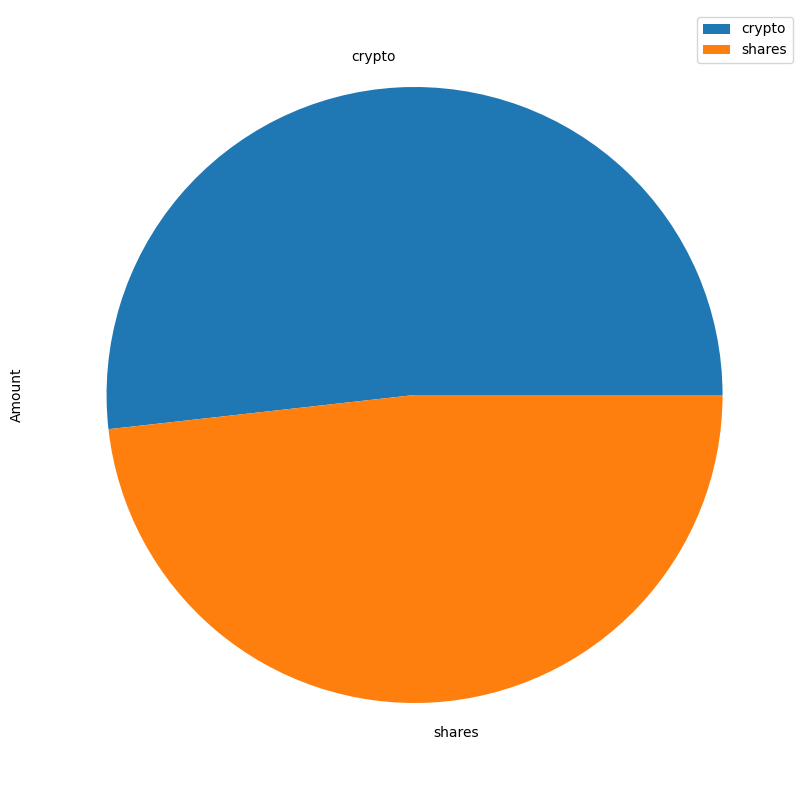

In [21]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="Amount",figsize=(20,10))

In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
savings = df_savings['Amount'].sum()

# Validate saving health
# YOUR CODE HERE!
if savings > emergency_fund:
    print('Congratulations! You have enough monery in yout emergency fund.')
elif savings == emergency_fund:
    print('Congratulations! You have reached your savings goal.')
else:
    money_needed = emergency_fund-savings
    print(f'You need ${money_needed} more dollars to reach your savingd goal')

Congratulations! You have enough monery in yout emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
spy_agg_df = alpaca_api.get_bars(tickers, 
                                 timeframe, 
                                 start=start, 
                                 end=end).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = spy_agg_df[spy_agg_df["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = spy_agg_df[spy_agg_df["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                         
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939  \
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                   
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41  \
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [27]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
ears = 30
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                         
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939  \
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY   
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92  \
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                             
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580  \
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [36]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_dist.portfolio_data.head()

AGG                                         
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939  \
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY   
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92  \
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                             
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580  \
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [37]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

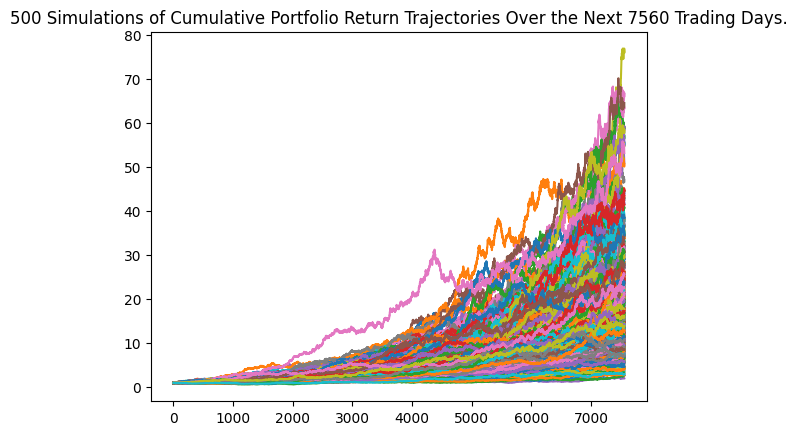

In [38]:
# Plot simulation outcomes
# YOUR CODE HERE!
MCSimulation.plot_simulation(MC_dist)

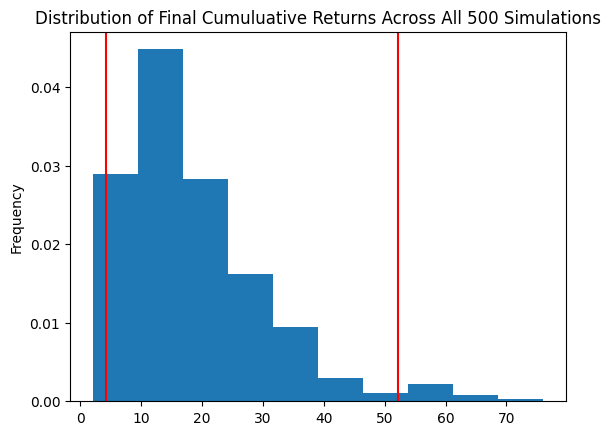

In [47]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_dist.summarize_cumulative_return()
#att_tbl = MC_att.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

AttributeError: 'Series' object has no attribute 'append'

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Print results
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")